In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [31]:
# load data
df = pd.read_csv('data/Global_Space_Exploration_Dataset.csv')

# check the first few rows of the dataframe
df.head()

# check the shape of the dataframe
print(df.shape)
# check the columns of the dataframe
print(df.columns)
# check the data types of the columns
df.dtypes

(3000, 12)
Index(['Country', 'Year', 'Mission Name', 'Mission Type', 'Launch Site',
       'Satellite Type', 'Budget (in Billion $)', 'Success Rate (%)',
       'Technology Used', 'Environmental Impact', 'Collaborating Countries',
       'Duration (in Days)'],
      dtype='object')


Country                     object
Year                         int64
Mission Name                object
Mission Type                object
Launch Site                 object
Satellite Type              object
Budget (in Billion $)      float64
Success Rate (%)             int64
Technology Used             object
Environmental Impact        object
Collaborating Countries     object
Duration (in Days)           int64
dtype: object

In [43]:
#  Data Cleaning and Preparation

df_cleaned = df.copy()

# check and remove duplicates
duplicate_count = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


# check for missing values
print("\nMissing values by column:")
missing_summary = df_cleaned.isnull().sum()
print(missing_summary)

# fix data types for numeric columns
numeric_columns = ['Year', 'Budget (in Billion $)', 'Success Rate (%)', 'Duration (in Days)']
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# post conversion data type check
print("\nData types after conversion:")
print(df_cleaned.dtypes)

# remove rows with missing values in critical numeric columns
df_cleaned = df_cleaned.dropna(subset=numeric_columns)

# final dataset dimensions
print("\nFinal dataset dimensions after cleaning:", df_cleaned.shape)


Number of duplicate rows: 0

Missing values by column:
Country                    0
Year                       0
Mission Name               0
Mission Type               0
Launch Site                0
Satellite Type             0
Budget (in Billion $)      0
Success Rate (%)           0
Technology Used            0
Environmental Impact       0
Collaborating Countries    0
Duration (in Days)         0
dtype: int64

Data types after conversion:
Country                     object
Year                         int64
Mission Name                object
Mission Type                object
Launch Site                 object
Satellite Type              object
Budget (in Billion $)      float64
Success Rate (%)             int64
Technology Used             object
Environmental Impact        object
Collaborating Countries     object
Duration (in Days)           int64
dtype: object

Final dataset dimensions after cleaning: (3000, 12)


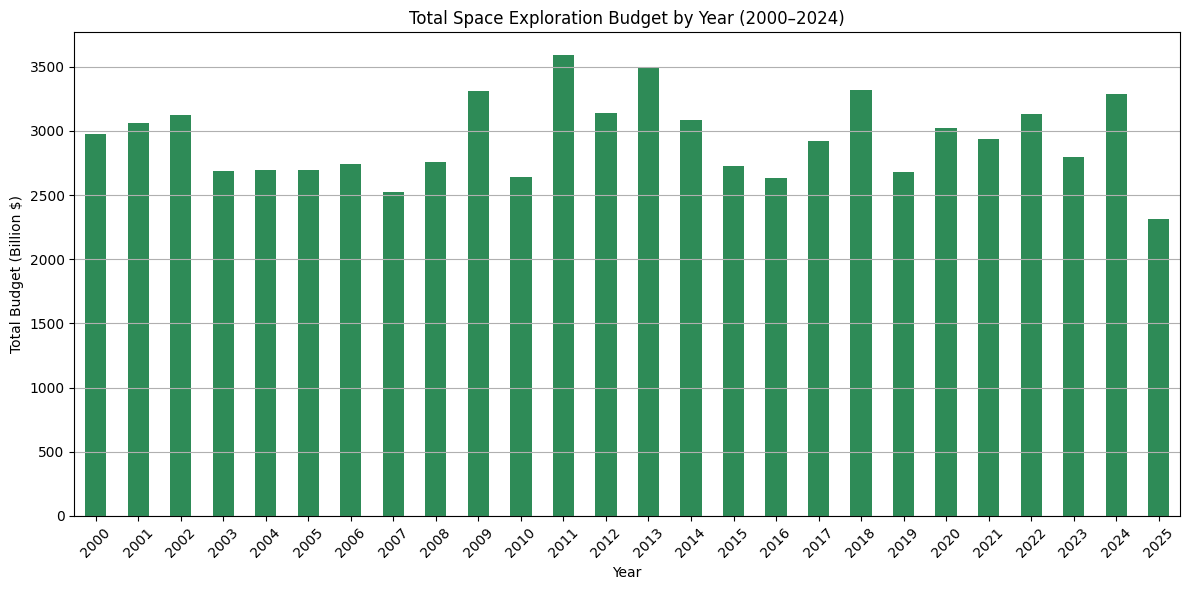

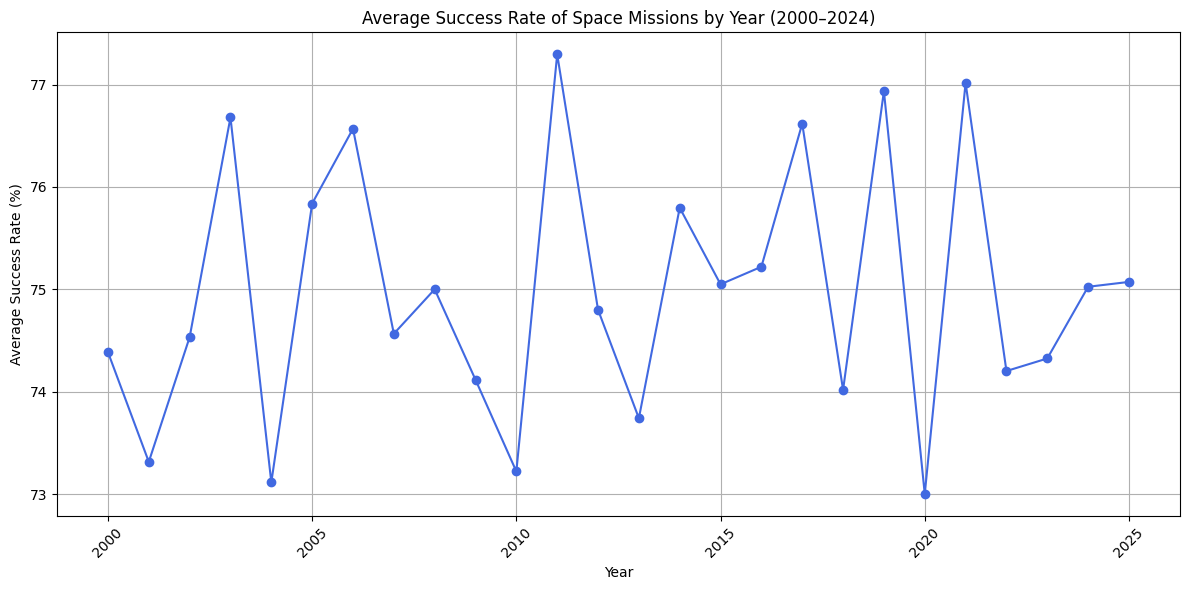

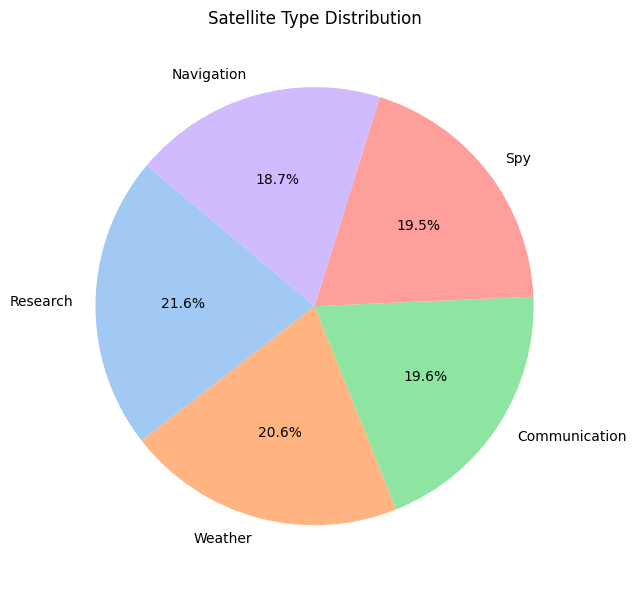

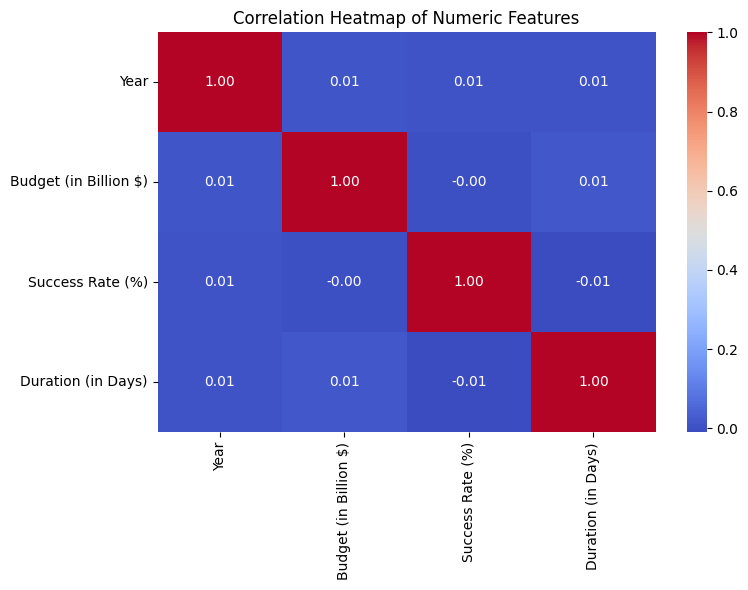

<Figure size 1200x600 with 0 Axes>

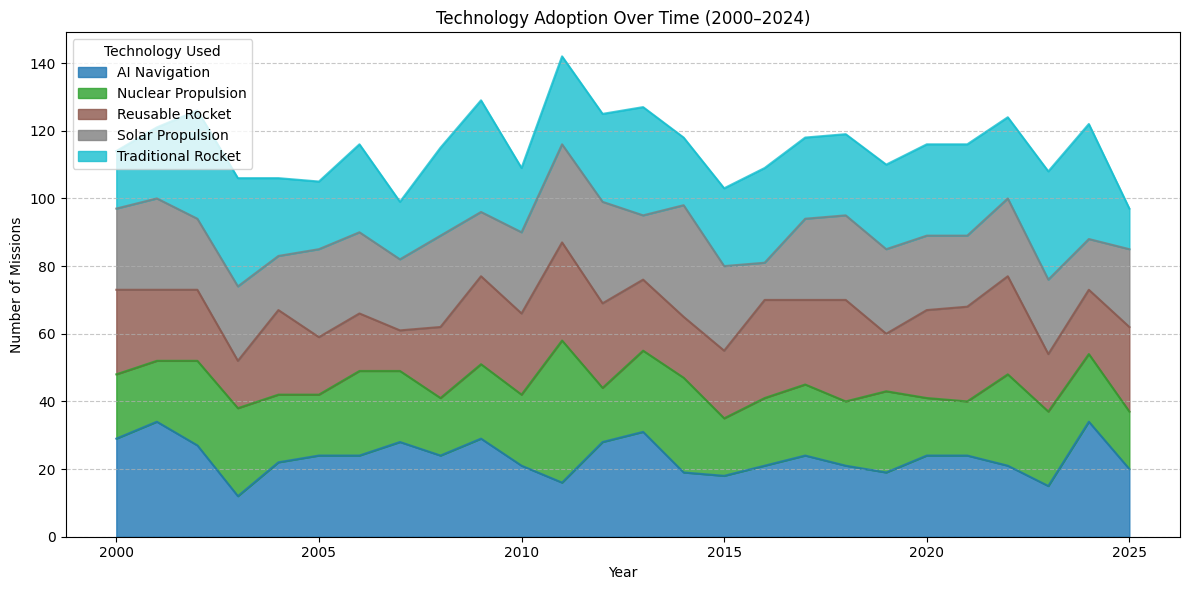

In [ ]:
# Explanatory Data Analysis

# plot the distribution of the budget
plt.figure(figsize=(12, 6))
budget_per_year = df.groupby('Year')['Budget (in Billion $)'].sum()
budget_per_year.plot(kind='bar', color='seagreen')
plt.title('Total Space Exploration Budget by Year (2000–2024)')
plt.xlabel('Year')
plt.ylabel('Total Budget (Billion $)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# plotting the success rate over the years
plt.figure(figsize=(12, 6))
success_rate_per_year = df.groupby('Year')['Success Rate (%)'].mean()
success_rate_per_year.plot(kind='line', marker='o', color='royalblue')
plt.title('Average Success Rate of Space Missions by Year (2000–2024)')
plt.xlabel('Year')
plt.ylabel('Average Success Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='both')
plt.tight_layout()
plt.show()

# plotting satellite types
plt.figure(figsize=(12, 6))
df['Satellite Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Satellite Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# plotting heatmap of numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

# plotting technology adoption over time
plt.figure(figsize=(12, 6))
tech_over_time = df.groupby(['Year', 'Technology Used']).size().unstack().fillna(0)
tech_over_time.plot(kind='area', stacked=True, figsize=(12, 6), cmap='tab10', alpha=0.8)
plt.title('Technology Adoption Over Time (2000–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.legend(title='Technology Used', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Model Performance Metrics:
R² Score: -0.12
Mean Squared Error (MSE): 259.30
Mean Absolute Error (MAE): 13.91


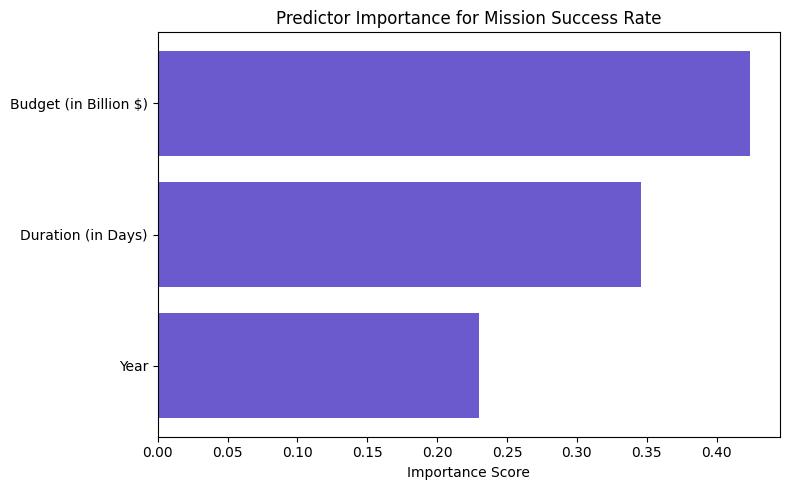

In [ ]:
# estimating the success rate of space missions using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


predictors = ['Year', 'Budget (in Billion $)', 'Duration (in Days)']
target_variable = 'Success Rate (%)'

X = df[predictors]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)

r2_value = r2_score(y_test, predictions)
mse_value = mean_squared_error(y_test, predictions)
mae_value = mean_absolute_error(y_test, predictions)

print(f"Model Performance Metrics:")
print(f"R² Score: {r2_value:.2f}")
print(f"Mean Squared Error: {mse_value:.2f}")
print(f"Mean Absolute Error: {mae_value:.2f}")

feature_importance = model_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], color='slateblue')
plt.yticks(range(len(sorted_idx)), [predictors[i] for i in sorted_idx])
plt.title('Predictor Importance for Mission Success Rate')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()